# Wavelets

In [1]:
pip install pywavelets

Note: you may need to restart the kernel to use updated packages.


PyWavelets is a Python library that provides tools for working with wavelet transforms. Wavelet transforms are mathematical transformations used in signal processing and data analysis. They are particularly effective for analyzing and processing signals that have both high and low-frequency components, making them suitable for tasks like denoising, compression, feature extraction, and more.

Here are some key features and functions provided by the PyWavelets library:

Wavelet Transforms: The library allows you to perform various wavelet transforms, including the continuous wavelet transform (CWT) and the discrete wavelet transform (DWT).

Signal Decomposition and Reconstruction: With PyWavelets, you can decompose a signal into its wavelet coefficients, which represent the signal's frequency content at different scales. You can then reconstruct the signal from these coefficients.

Denoising: One of the common applications of wavelet transforms is denoising. By thresholding and modifying wavelet coefficients, you can remove unwanted noise from signals.

Multilevel Decomposition: PyWavelets supports multilevel decomposition, allowing you to perform multiple iterations of the wavelet transform to capture finer details in signals.

Various Wavelet Families: The library offers a variety of wavelet families, including Daubechies, Symlets, Coiflets, and more. Each family consists of different wavelet functions that are better suited for specific types of data.

Thresholding: PyWavelets provides functions for applying different thresholding techniques to wavelet coefficients, which is a crucial step in denoising and compression.

Inverse Transform: You can use the inverse wavelet transform to reconstruct a signal from its wavelet coefficients, allowing you to revert back to the original data.

Boundary Handling: The library provides options for handling boundary effects during transformations, ensuring accurate results even at the edges of the data.

Visualization: PyWavelets includes tools for visualizing wavelet transforms, coefficients, and reconstructed signals.

The library is widely used in various fields, including signal processing, image analysis, time series analysis, and more. It offers a flexible and efficient way to work with wavelet transforms in Python, making it a valuable tool for researchers, data scientists, and engineers.

[*********************100%%**********************]  1 of 1 completed


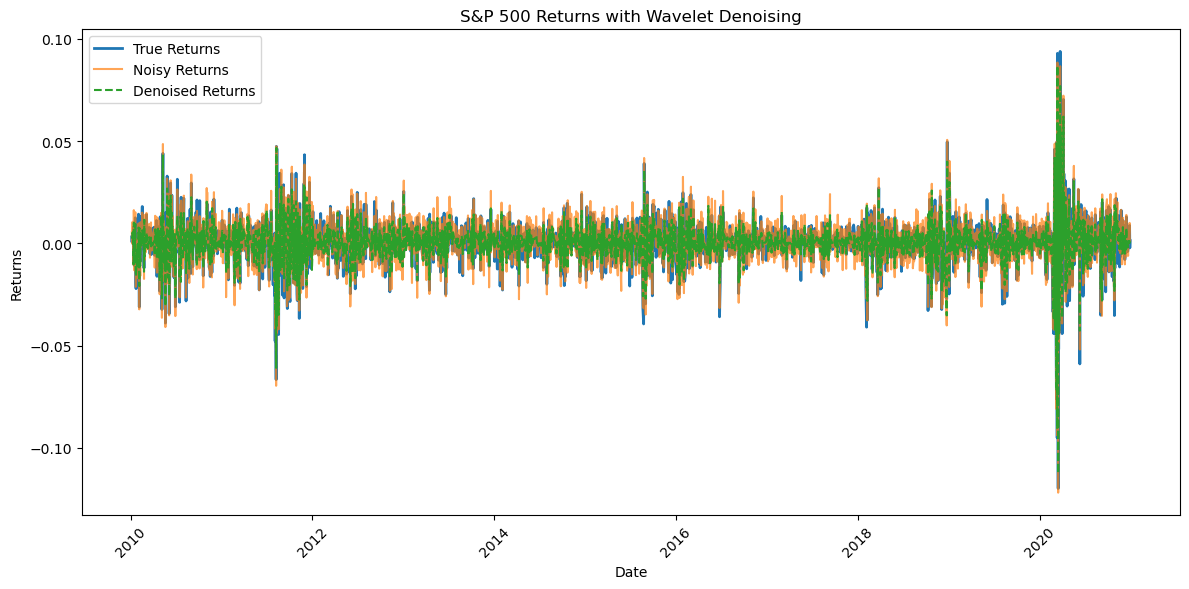

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import yfinance as yf

# Download S&P 500 data
data = yf.download('^GSPC', start='2010-01-01', end='2020-12-31')
returns = data['Adj Close'].pct_change().dropna()

# Simulate noisy returns
np.random.seed(42)
noisy_returns = returns + np.random.normal(0, 0.005, len(returns))

# Set wavelet parameters
wavelet = 'db4'  # Daubechies 4 wavelet
level = 3       # Decomposition level

# Perform wavelet decomposition
coeffs = pywt.wavedec(noisy_returns, wavelet, level=level)

# Apply soft thresholding to the coefficients
threshold = np.std(coeffs[0]) / 2
denoised_coeffs = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]

# Reconstruct the denoised returns
denoised_returns = pywt.waverec(denoised_coeffs, wavelet)[:len(returns)]  # Adjust the length

# Plot denoised returns with corresponding dates
plt.figure(figsize=(12, 6))
plt.plot(returns.index, returns, label='True Returns', linewidth=2)
plt.plot(returns.index, noisy_returns, label='Noisy Returns', alpha=0.7)
plt.plot(returns.index, denoised_returns, label='Denoised Returns', linestyle='dashed')
plt.legend()
plt.title('S&P 500 Returns with Wavelet Denoising')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
